In [72]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
dat = np.loadtxt('dbug.dat')
print dat.shape
L = dat.shape[1]
s1 = dat[:L]
r = dat[L:2*L]
s2 = dat[2*L:]

(1536, 512)


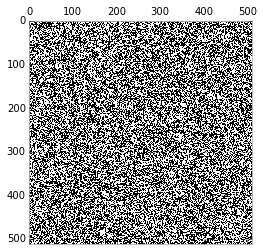

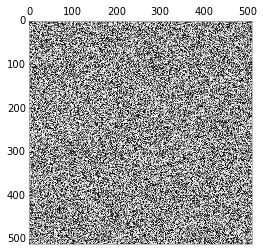

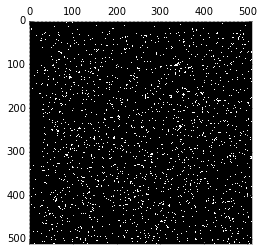

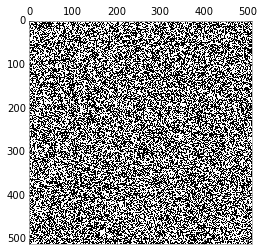

In [83]:
plt.matshow(s1, cmap='Greys')
plt.matshow(r, cmap='Greys')
plt.matshow(s2, cmap='Greys')
plt.matshow(s2 == s1, cmap='Greys')

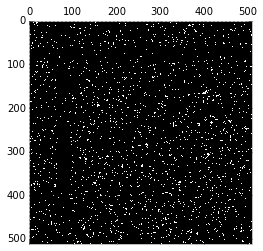

In [84]:
plt.matshow(np.roll(np.roll(s2, 64, 0), 64, 1), cmap='Greys')

In [61]:
magvT = np.loadtxt("mag.dat")

(-1, 1)

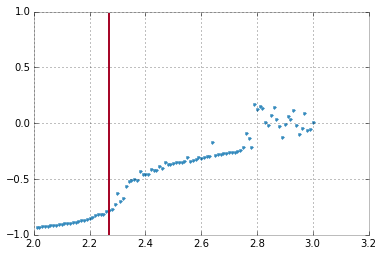

In [62]:
Tc = 2./np.log(1+np.sqrt(2))
plt.plot(magvT[:,1], magvT[:,0], '.')
plt.plot([Tc,Tc], [-1,1], '-')
plt.ylim([-1,1])

In [16]:
2./np.log(1+np.sqrt(2))

2.2691853142130221

In [5]:
(-1)%16

15